In [1]:
import visualize_background as vb
import visualize_foreground as vf
import visualize_rhs as vr
import os

import h5py

def read_hdf5_write_text(hdf5_file_path, text_file_path):
    with h5py.File(hdf5_file_path, 'r') as file:
        with open(text_file_path, 'w') as text_file:
            # Iterate through groups in the HDF5 file
            for group_name in file.keys():
                group = file[group_name]
                text_file.write(f"{group_name}\n")
                text_file.write("-" * len(group_name) + "\n")

                # Iterate through datasets in the group
                for ds_name in group.keys():
                    data = group[ds_name][()]
                    text_file.write(f"{ds_name}: {data}\n")

                text_file.write("\n")  # Add a newline for separation between groups

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
DATA_FOLDER = "/mn/stornext/d10/data/tabjone/data/"
RUN_NAME = "test_1/"
SAVE_FOLDER = "test_1/"

/net/hume.uio.no/uio/hume/student-u58/tabjone/anelastic_mhd_solver/visualisation/visualize_background.py:38: RuntimeWarning: invalid value encountered in divide
  solar_S['g'] = -G*solar_S['M']/((solar_S['r_over_R']*R_sun)**2)


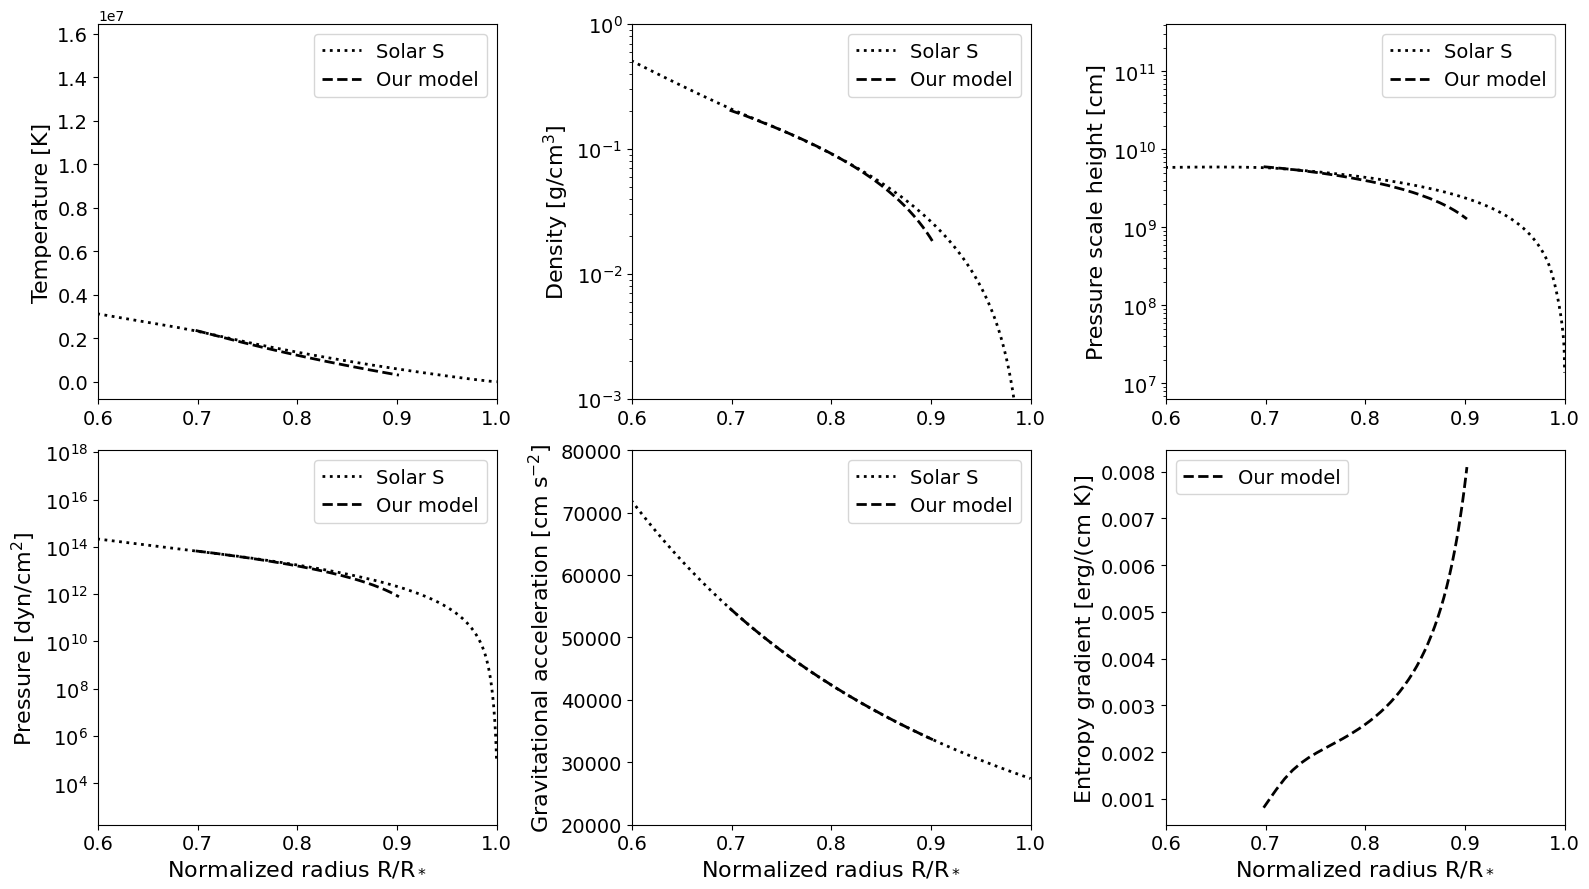

In [3]:
# Create save folder if it does not exist
if not os.path.exists(SAVE_FOLDER):
    os.makedirs(SAVE_FOLDER)

vb.plot_background(DATA_FOLDER, RUN_NAME, SAVE_FOLDER+"background.pdf")

/uio/hume/student-u58/tabjone/.local/lib/python3.9/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/uio/hume/student-u58/tabjone/.local/lib/python3.9/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


KeyboardInterrupt: 

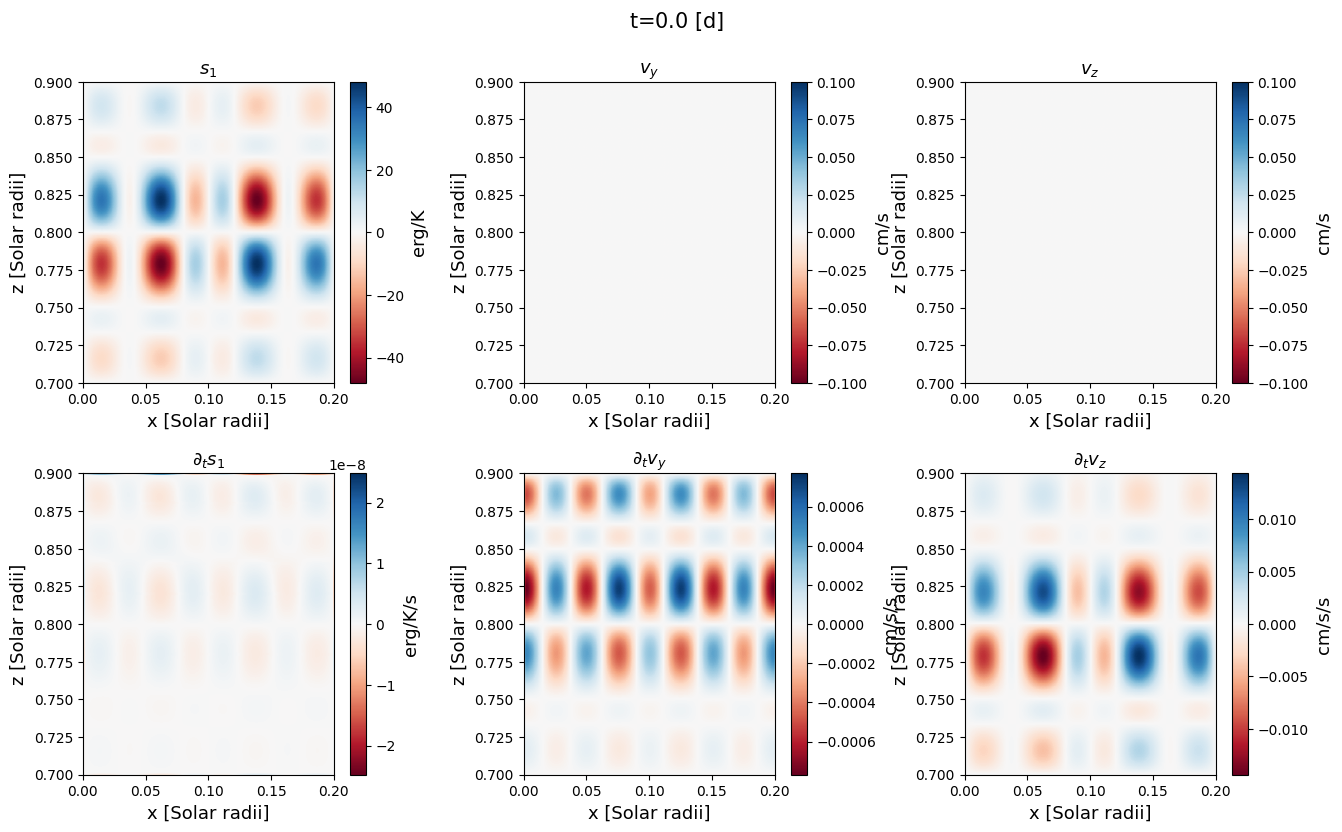

In [13]:
n_procs = vf.read_mpi_info(DATA_FOLDER+RUN_NAME+"mpi_info.h5")
vr.animate_all(DATA_FOLDER+RUN_NAME, SAVE_FOLDER+"rhs.mp4", fps=5, save_interval=10)

/uio/hume/student-u58/tabjone/.local/lib/python3.9/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/uio/hume/student-u58/tabjone/.local/lib/python3.9/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


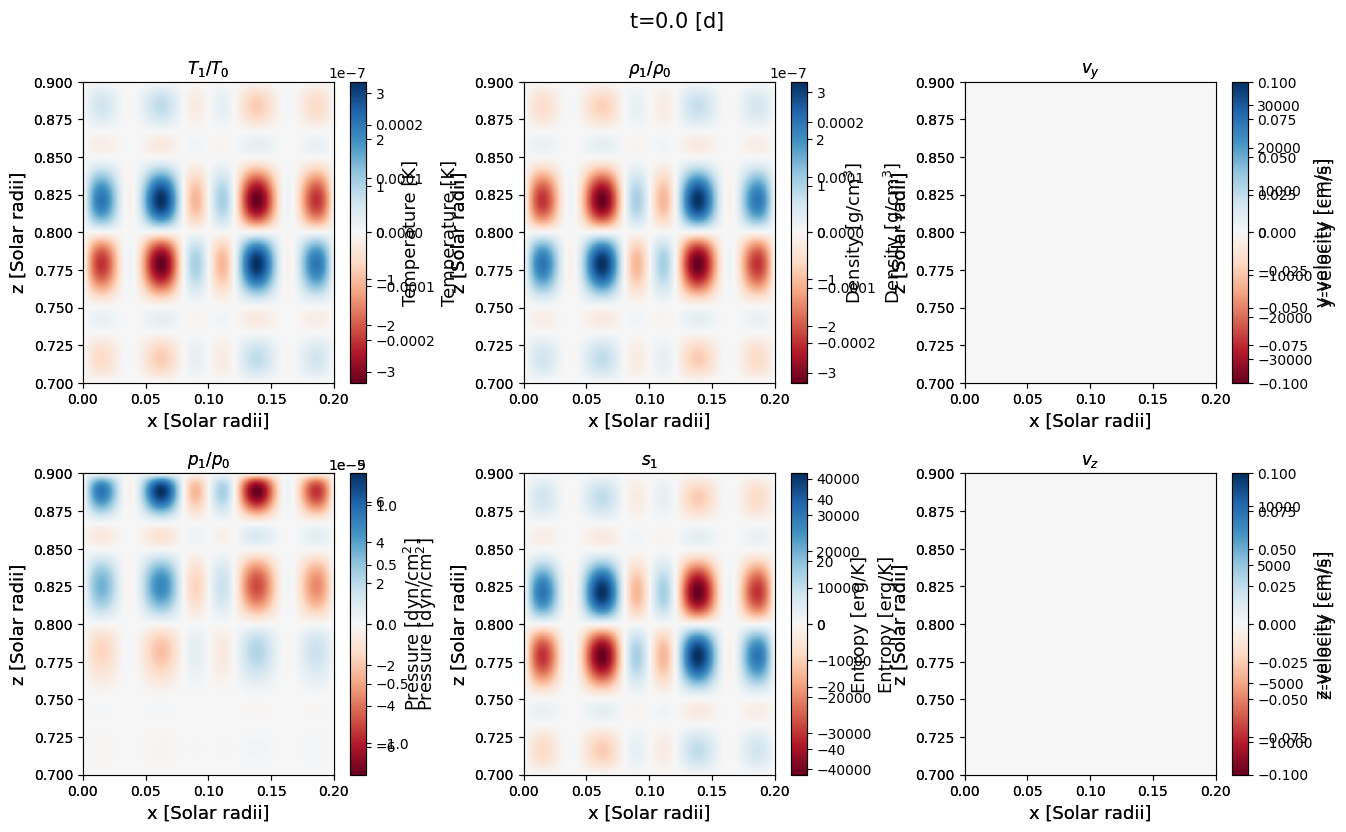

In [14]:
vf_class = vf.Visualize_Foreground(DATA_FOLDER+RUN_NAME, delta=False)
vf_class.norm = vf.TwoSlopeNorm
vf_class.animate_all(save=True, save_name=SAVE_FOLDER+"foreground.mp4", fps=5, save_interval=10)

In [ ]:
read_hdf5_write_text(DATA_FOLDER+RUN_NAME+"info.h5", SAVE_FOLDER+"info.txt")

In [ ]:
0.4*0.6

In [8]:
vars, info = vf.read_fg_mpi(150, 3, DATA_FOLDER+RUN_NAME)

In [10]:
vars['p1'][-4:][0:4]

array([[-0.00406679, -0.00532202, -0.00657691, ..., -0.0003006 ,
        -0.00155593, -0.00281137],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])